In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183413.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183212.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183050_01.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183033.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183359.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183355.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183014.jpg
/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training/good_Cucumber/IMG20200629183105.jpg
/kaggle/input

In [2]:
import torch
import fastai
from fastai.tabular.all import *
from fastai.text.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *
from fastai import *

from PIL import Image

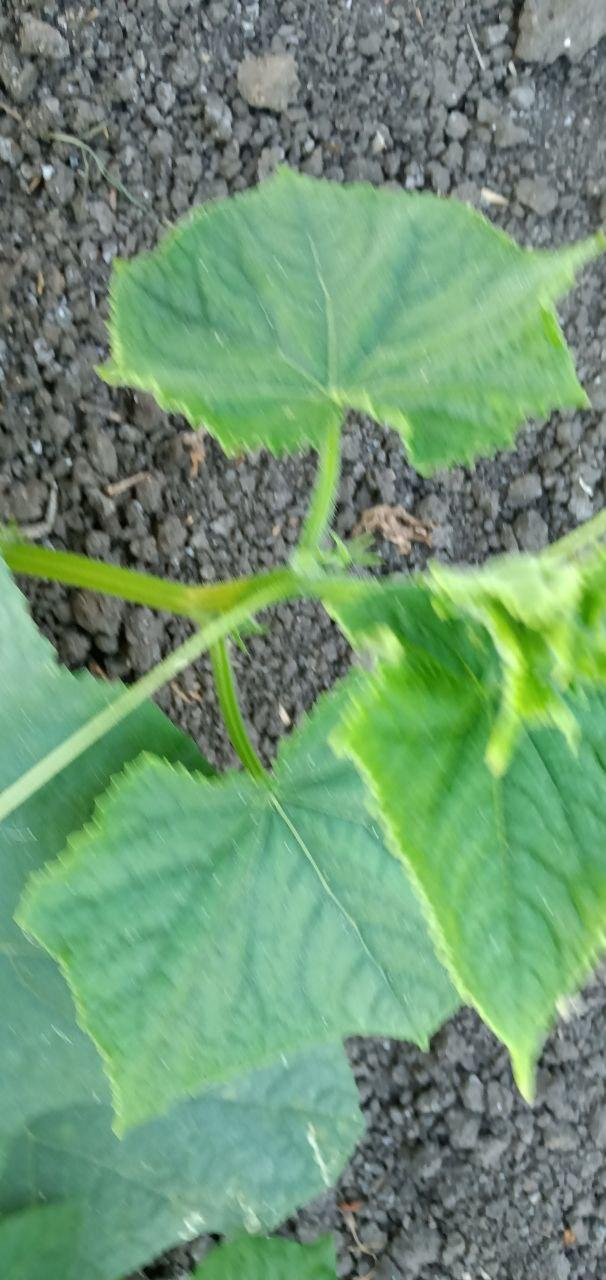

In [4]:
img = Image.open("/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/testing/good_Cucumber/photo_2020-06-28_00-00-46.jpg")
img

In [5]:
TensorTypes = (TensorImage, TensorMask, TensorPoint, TensorBBox)

In [6]:
def _add1(x): return x+1
dumb_tfm = RandTransform(enc=_add1, p=0.5)
start, d1, d2 = 2, False, False
for _ in range(40):
    t = dumb_tfm(start, split_idx=0)
    if dumb_tfm.do: test_eq(t, start+1); d1=True
    else: test_eq(t, start); d2=True
assert d1 and d2
dumb_tfm

_add1 -- {'p': 0.5}:
encodes: (object,object) -> _add1decodes: 

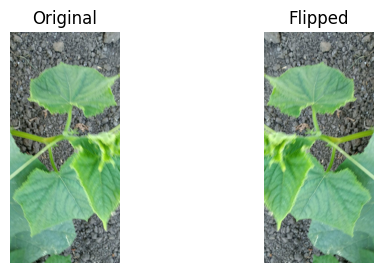

In [7]:
_, axs = subplots(1, 2)
show_image(img, ctx=axs[0], title='Original')
show_image(img.flip_lr(), ctx=axs[1], title='Flipped');

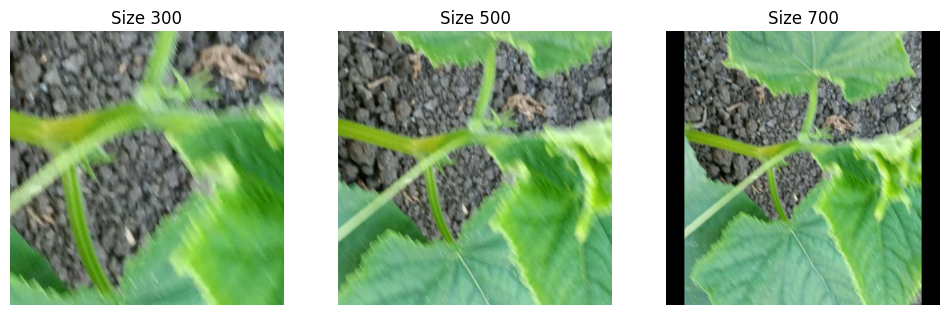

In [8]:
_, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, sz in zip(axs.flatten(), [300, 500, 700]):
    show_image(img.crop_pad(sz), ctx=ax, title=f'Size {sz}');

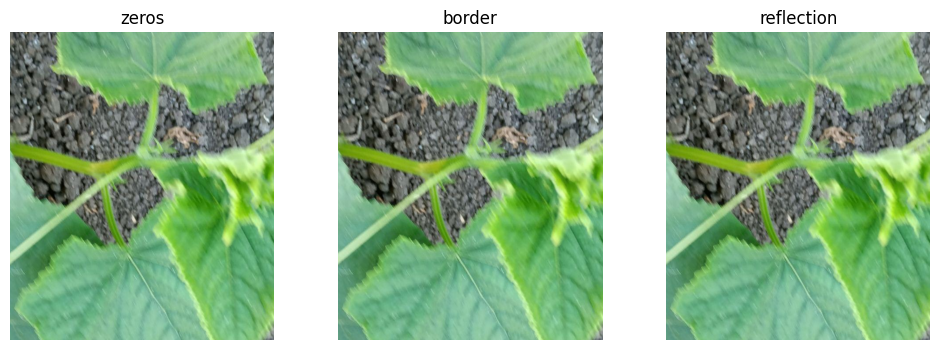

In [9]:
_, axs = plt.subplots(1, 3, figsize=(12, 4))
for ax, mode in zip(axs.flatten(), [PadMode.Zeros, PadMode.Border, PadMode.Reflection]):
    show_image(img.crop_pad((600, 700), pad_mode=mode), ctx=ax, title=mode)

In [10]:
from fastai.imports import *
from fastai.vision.data import *
from fastai import *
import matplotlib.pyplot as plt

In [11]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [12]:
base_path = Path("/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset")
train_path = Path("/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/training")
test_path = Path("/kaggle/input/cucumber-plant-diseases-dataset/Cucumber plant diseases dataset/testing")

In [14]:
dls = ImageDataLoaders.from_folder(
    base_path,
    train='training',
    valid='testing',
    valid_pct=None,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(mult=2)
)

In [15]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 81.6MB/s]


In [16]:
learn.fine_tune(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.674699,0.412490,0.860360,00:23


epoch,train_loss,valid_loss,accuracy,time
0,0.333405,0.279223,0.932432,00:24
1,0.295376,0.120120,0.950450,00:23
2,0.267466,0.079989,0.963964,00:24
3,0.222499,0.067284,0.977477,00:23
4,0.209552,0.066172,0.977477,00:23


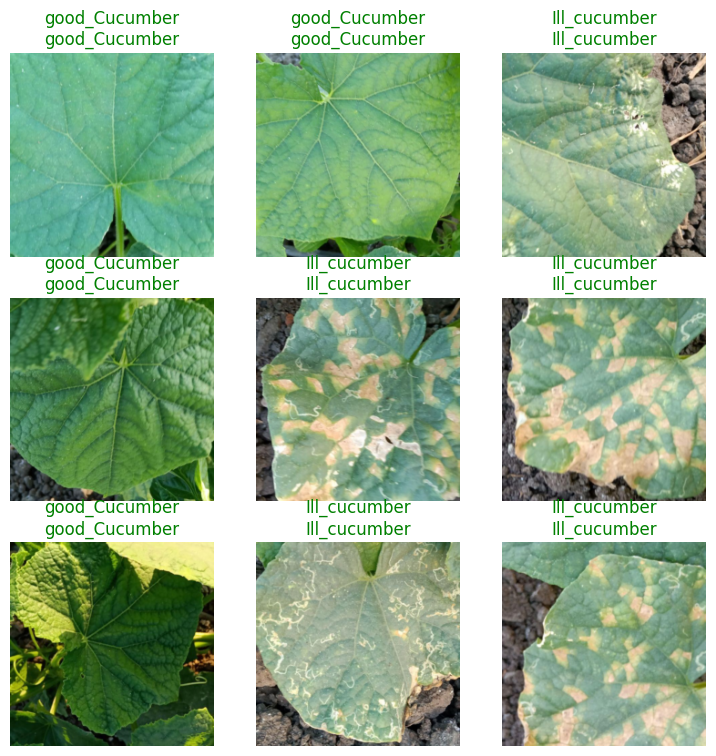

In [17]:
learn.show_results()

In [20]:
learn.export('/kaggle/working/cucumber_classifier_model.pkl')